## EDA (Exploratory Data Analysis)

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Sample Dataset

### Titanic Dataset Overview

The Titanic dataset contains passenger information from the Titanic disaster and is commonly used for classification and exploratory data analysis tasks. The goal is often to analyze patterns in survival based on demographic and travel-related features.

---

#### **Dataset Features**
- **survived**: Survival indicator (0 = No, 1 = Yes)
- **pclass**: Passenger class (1 = First, 2 = Second, 3 = Third)
- **sex**: Gender of the passenger
- **age**: Age of the passenger (in years)
- **sibsp**: Number of siblings or spouses aboard
- **parch**: Number of parents or children aboard
- **fare**: Ticket fare paid by the passenger
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- **class**: Alternative representation of `pclass` (First, Second, Third)
- **who**: Category based on gender and age (man, woman, child)
- **adult_male**: Boolean flag indicating if passenger is an adult male
- **alone**: Boolean flag indicating if the passenger was traveling alone
- **deck**: Deck level (contains many missing values)
- **embark_town**: Name of the town where the passenger boarded
- **alive**: String indicator for survival (yes/no)

---

#### **Dataset Characteristics**
- Total Rows: 891
- Mix of **numeric**, **categorical**, and **boolean** features
- **Missing Values**:  
  - `age` has missing values
  - `deck` has a large number of missing values
  - `embarked` and `embark_town` have a few missing entries

---

#### **Objective of Analysis**
- Explore relationships between demographic/travel features and survival outcome
- Identify important factors affecting survival
- Handle missing values, outliers, and correlations as part of EDA


In [2]:
# ---- STEP 1: Load Titanic Dataset ----
df = sns.load_dataset('titanic')

print("Sample Data (Before Cleaning):")
print(df.head())

Sample Data (Before Cleaning):
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Analysis of Missing values


Missing values per column:
         column  missing_count  missing_percent
0      survived              0         0.000000
1        pclass              0         0.000000
2           sex              0         0.000000
3           age            177        19.865320
4         sibsp              0         0.000000
5         parch              0         0.000000
6          fare              0         0.000000
7      embarked              2         0.224467
8         class              0         0.000000
9           who              0         0.000000
10   adult_male              0         0.000000
11         deck            688        77.216611
12  embark_town              2         0.224467
13        alive              0         0.000000
14        alone              0         0.000000


C:\Users\Pinak\AppData\Local\Temp\ipykernel_5020\3741292716.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='missing_percent', y='column', data=missing_data, palette='viridis')


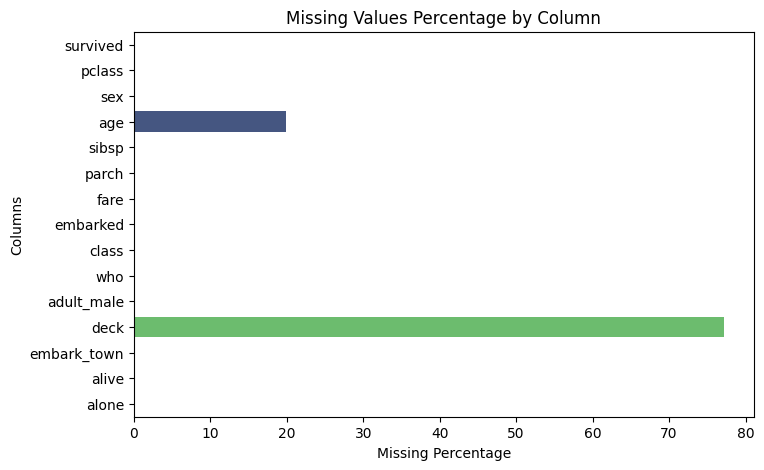

In [3]:
# ---- STEP 2: Missing Values Overview ----
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['column', 'missing_count']
missing_data['missing_percent'] = (missing_data['missing_count'] / len(df)) * 100

print("\nMissing values per column:")
print(missing_data)

# Visualize missing value percentage
plt.figure(figsize=(8, 5))
sns.barplot(x='missing_percent', y='column', data=missing_data, palette='viridis')
plt.title('Missing Values Percentage by Column')
plt.xlabel('Missing Percentage')
plt.ylabel('Columns')
plt.show()

### Choosing the right columns 

In [4]:
# ---- STEP 3: Drop columns with >40% missing values ----
high_missing_cols = missing_data[missing_data['missing_percent'] > 40]['column'].tolist()
print(f"\nDropping columns with >40% missing data: {high_missing_cols}")
df.drop(columns=high_missing_cols, inplace=True)

# ---- STEP 4: Fill Missing Values ----
# Numeric columns -> fill with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns -> fill with mode
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Dropping columns with >40% missing data: ['deck']

Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


### Correlation Analysis

### Correlation Heatmap Explanation (Titanic Dataset)

The heatmap shows **Pearson correlation coefficients** between numeric variables in the Titanic dataset.  
Correlation values range from **-1 to +1**:

- **+1** → Perfect positive correlation (both variables increase together)
- **-1** → Perfect negative correlation (one increases while the other decreases)
- **0** → No correlation

---

#### **Key Observations**
- **Survived vs Pclass (-0.33)**  
  Negative correlation → Higher passenger class (`pclass` = 1 means 1st class) is associated with higher survival chances.
  
- **Survived vs Fare (+0.25)**  
  Positive correlation → Higher fare passengers were more likely to survive (wealthier passengers likely in 1st class).

- **Survived vs Adult Male (-0.53)**  
  Strong negative correlation → Adult males had much lower chances of survival compared to others (due to "women and children first" policy).

- **SibSp vs Parch (+0.38)**  
  Positive correlation → Passengers traveling with siblings/spouses also tend to have parents/children on board (family traveling together).

- **SibSp vs Alone (-0.61)** and **Parch vs Alone (-0.57)**  
  Strong negative correlation → If a passenger is alone, they have zero siblings/spouses and zero parents/children on board.

- **Age vs SibSp (-0.28)**  
  Slight negative correlation → Older passengers are less likely to travel with siblings/spouses (likely independent).

---

#### **General Insights**
- Survival is **positively related to fare** and **negatively related to being an adult male** or being in a lower class.
- Family-related features (`sibsp`, `parch`) are correlated with each other and inversely correlated with being alone.
- Age has weak correlations with survival-related factors.



Correlation Matrix:
            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.331388 -0.078114 -0.037841  0.069864  0.247159   
pclass     -0.331388  1.000000 -0.342745  0.087050  0.038998 -0.554649   
age        -0.078114 -0.342745  1.000000 -0.279316 -0.182697  0.092503   
sibsp      -0.037841  0.087050 -0.279316  1.000000  0.379535  0.133807   
parch       0.069864  0.038998 -0.182697  0.379535  1.000000  0.190823   
fare        0.247159 -0.554649  0.092503  0.133807  0.190823  1.000000   
adult_male -0.529158  0.069762  0.274454 -0.272326 -0.345630 -0.164481   
alone      -0.176714  0.113778  0.190270 -0.607809 -0.569387 -0.245168   

            adult_male     alone  
survived     -0.529158 -0.176714  
pclass        0.069762  0.113778  
age           0.274454  0.190270  
sibsp        -0.272326 -0.607809  
parch        -0.345630 -0.569387  
fare         -0.164481 -0.245168  
adult_male    1.000000  0.384923  
alone         0.384923  1.000000

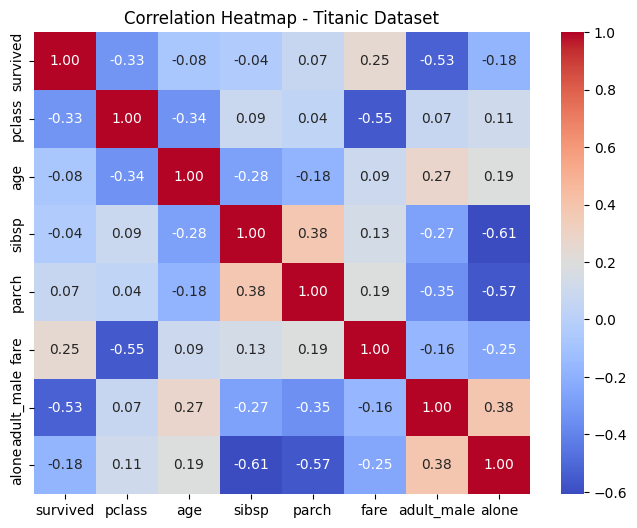

In [5]:
# ---- STEP 5: Correlation Analysis ----
corr_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()